In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import diffimTests as dit
import scipy.stats

In [2]:
im1, im2, x0im, y0im = dit.makeFakeImages()
print scipy.stats.describe(im2 - im1, axis=None)

DescribeResult(nobs=262144, minmax=(-1210.0778127409128, 316.16017124971597), mean=10.000018018197299, variance=3198.5279104754504, skewness=-7.46275033511314, kurtosis=80.5132389384881)


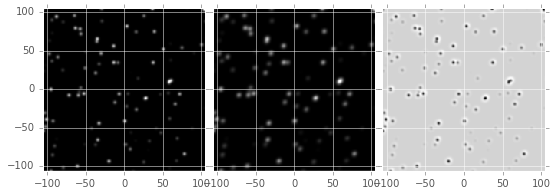

In [3]:
extent = (x0im.min()+150, x0im.max()-150, y0im.min()+150, y0im.max()-150)
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
dit.plotImageGrid((im1[x1d:x2d,y1d:y2d], im2[x1d:x2d,y1d:y2d], (im2-im1)[x1d:x2d,y1d:y2d]), extent=extent, imScale=3)

0.207695102599 0.221794245201
DescribeResult(nobs=262144, minmax=(-0.90392937801220796, 4.5625380767000649), mean=4.7411121523958238e-13, variance=0.043258677502774526, skewness=0.4284402650076264, kurtosis=6.988769563400854)
DescribeResult(nobs=262144, minmax=(-1.2512959780887016, 5.3119336020343395), mean=-1.0306213054147403e-05, variance=0.078255301581523024, skewness=0.2509426942047008, kurtosis=3.5407224981852883)


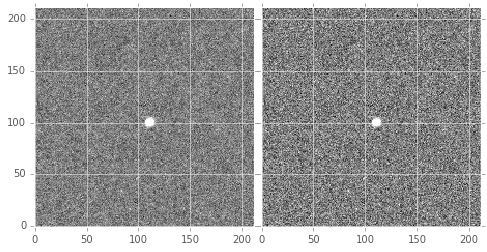

In [4]:
diffim1, kappa = dit.performAlardLupton(im1, im2, doALZCcorrection=False, verbose=False)
diffim2, kappa = dit.performAlardLupton(im1, im2, doALZCcorrection=True, verbose=False)
extent = (x0im.min()+150, x0im.max()-150, y0im.min()+150, y0im.max()-150)
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
dit.plotImageGrid((diffim1[x1d:x2d,y1d:y2d], diffim2[x1d:x2d,y1d:y2d]), imScale=4., clim=(-1,1))
print scipy.stats.describe(diffim1, axis=None)
print scipy.stats.describe(diffim2, axis=None)

-0.973445516356 0.972522883715
Corrected: -0.000435005145373 0.20444817682
Original:  -0.000482737658876 0.276232037957
Expected:  0.282842712475


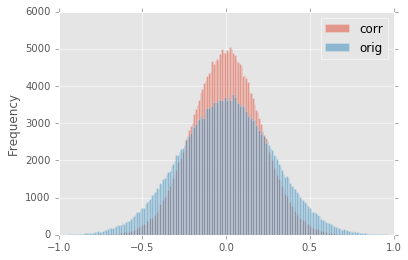

In [5]:
import pandas as pd
#df = pd.DataFrame({'corr': pci.flatten(), 'orig': (im2-conv_im1).flatten()})
#df.plot.hist(alpha=0.5, bins=200)

_, low, upp = scipy.stats.sigmaclip([diffim1, diffim2])
print low, upp
tmp1a = diffim1[(diffim1>low) & (diffim1<upp) & (diffim2>low) & (diffim2<upp)]
tmp2a = diffim2[(diffim1>low) & (diffim1<upp) & (diffim2>low) & (diffim2<upp)]
df = pd.DataFrame({'corr': tmp1a.flatten(), 'orig': tmp2a.flatten()})
df.plot.hist(alpha=0.5, bins=200)

print 'Corrected:', np.mean(tmp1a), np.std(tmp1a)
print 'Original: ', np.mean(tmp2a), np.std(tmp2a)
print 'Expected: ', np.sqrt(0.2**2 + 0.2**2)

In [6]:
pcf = dit.computeCorrectedDiffimPsfALZC(kappa, psf2=2.2, sig1=0.2, sig2=0.2)

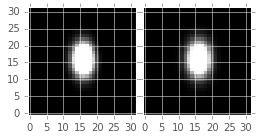

In [7]:
x = np.arange(-16, 16, 1)
y = x.copy()
x0, y0 = np.meshgrid(x, y)
psf2 = 2.2
im2_psf = dit.singleGaussian2d(x0, y0, 0, 0, psf2, psf2*1.5)

dit.plotImageGrid((pcf, im2_psf), clim=(0,0.01))

In [8]:
import cPickle
import gzip
#im1_psf = dit.gaussian2d(grid, m=[0, 0], s=[psf1, psf1])
#cPickle.dump((im1, im2, im1_psf, im2_psf, conv_im1, pci, pcf), gzip.GzipFile("14_results.p.gz", "wb"))